# Trabajo Práctico 8
Dadas imágenes a niveles de gris, binarizarlas y comparar los resultados:
* El resultado final tiene 50% de pixels negros y blancos.
* Encontrar dos modas “clara” y “oscura” y binarizar por distancia mínima.
* Binarización de Otsu.

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [2]:
def rgb_yiq (img):
    yiq=np.zeros(img.shape)
    yiq[:,:,0] = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    yiq[:,:,1] = 0.595716*img[:,:,0] - 0.274453*img[:,:,1] - 0.321263*img[:,:,2]
    yiq[:,:,2] = 0.211456*img[:,:,0] - 0.522591*img[:,:,1] + 0.311135*img[:,:,2]
    return yiq[:,:,0]

Genero una función que realice el histograma de frecuencia de pixels de la banda Y.

In [3]:
def hist (yiq):
    width, height=yiq.shape
    bins=100
    yiq_mod=np.reshape(yiq,(width*height))
    histo=np.histogram(yiq_mod, bins, range=(0,1))
    histo=histo[0]
    histo=histo/max(histo)
    return histo

Genero una función que realice el histograma acumulado de frecuencia de pixels de la banda Y.

In [4]:
def hist_ac (histo):
    bins=100
    cumHisto = np.zeros(bins)
    cumHisto[0] = histo[0]
    for i in range(bins-1):
        cumHisto[i+1] = cumHisto[i]+histo[i+1]    
        
    cumHisto /= cumHisto[bins-1] # normalization:
    return cumHisto

Genero una función que realice la binarización de los valores de cada pixel de la matriz Y.

In [5]:
def binarizacion (yiq):
    width,height = yiq.shape
    yiq_bin = np.zeros(yiq.shape)
    umb = np.median(yiq)
    for x in range (width):
        for y in range (height):
            if yiq[x,y] > umb:
                yiq_bin[x,y] = 1
            else:
                yiq_bin[x,y] = 0
    return yiq_bin

Genero una función para contabilizar la proporción de pixels blancos y negros luego de binarizar.

In [6]:
def proporcion (img):
    width,height = img.shape
    black=0
    white=0
    
    for x in range (width):
        for y in range (height):
            if img[x,y]==1:
                white=white+1
            else:
                black=black+1
    return (black,white)

Genero una función para el cálculo de distancia mínima.

In [7]:
def dist_min (yiq,bright,dark):
    width,height = yiq.shape
    yiq_bin = np.zeros(yiq.shape)
    umb = (bright + dark)/2
    for x in range (width):
        for y in range (height):
            if yiq[x,y] > umb:
                yiq_bin[x,y] = 1
            else:
                yiq_bin[x,y] = 0
    return yiq_bin

# Bloque Principal
Leo la imagen original en RGB, la normalizo y luego se transforma al espacio YIQ.

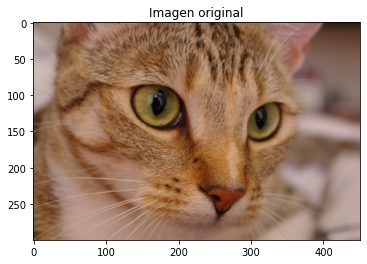

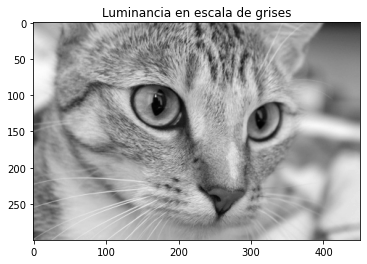

In [8]:
img1 = imageio.imread('imageio:chelsea.png')/255
plt.figure(0)
plt.title('Imagen original')
plt.imshow(img1)

img2=rgb_yiq(img1)
plt.figure(1)
plt.title('Luminancia en escala de grises')
plt.imshow(img2,'gray')

Histograma e histograma acumulado de la luminancia (banda Y).

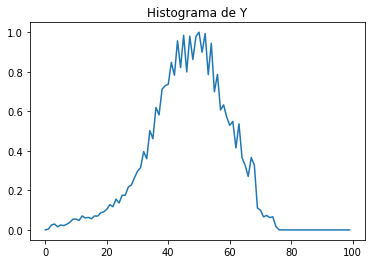

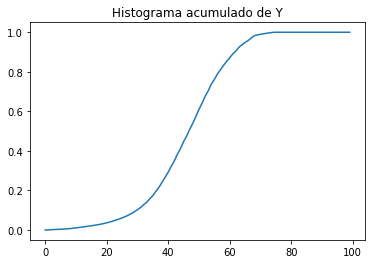

In [9]:
img3 = hist(img2)
plt.figure(2)
plt.title('Histograma de Y')
plt.plot(img3)

img4 = hist_ac (img3)
plt.figure(3)
plt.title('Histograma acumulado de Y')
plt.plot(img4)

Binarizacion a 50/50 de la imagen en escala de grises.

La proporcion de pixeles blancos en la imagen es: 49.99704360679971 %
La proporcion de pixeles negros en la imagen es 50.00295639320029 %


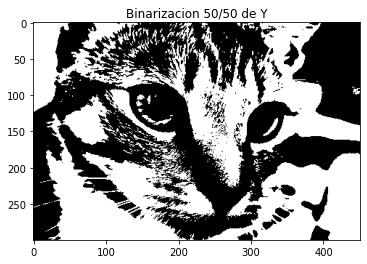

In [10]:
img5 = binarizacion(img2)
plt.figure(4)
plt.title('Binarizacion 50/50 de Y')
plt.imshow(img5,'gray')

width,height = img5.shape
negro,blanco = proporcion(img5)
frec_negro = negro/(width*height)*100
frec_blanco = blanco/(width*height)*100
print('La proporcion de pixeles blancos en la imagen es:',frec_blanco,'%')
print('La proporcion de pixeles negros en la imagen es',frec_negro,'%')

Binarizacion por distancia mínima a 2 modas.

El valor  de la moda clara es: 0.6812549019607843
El valor de la moda oscura es: 0
El valor  de la moda clara es: 0.6812549019607843
El valor de la moda oscura es: 0.44440784313725484


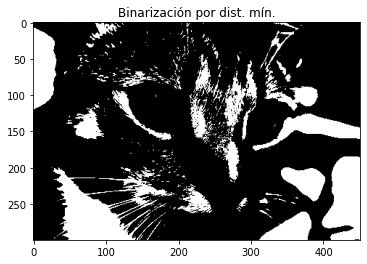

In [11]:
dark_mode = 0
bright_mode = 0

moda1 = stats.mode(img2, axis=None)
if moda1[0] > 0.5:
    bright_mode = float(moda1[0])
else:
    dark_mode = float(moda1[0])
print('El valor  de la moda clara es:',bright_mode)
print('El valor de la moda oscura es:',dark_mode)
#Ahora que sé si el primer resultado fue la moda clara u oscura puedo buscar la que me falta
width,height = img2.shape
img6 = np.zeros(img2.shape)
for x in range (width):
    for y in range (height):
        if img2[x,y] > (bright_mode-0.1):
            img6[x,y] = random.random()
        else:
            img6[x,y] = img2[x,y]

moda2 = stats.mode(img6, axis=None)
dark_mode = float(moda2[0])

print('El valor  de la moda clara es:',bright_mode)
print('El valor de la moda oscura es:',dark_mode)

img7 = dist_min(img2,bright_mode,dark_mode)
plt.figure(5)
plt.title('Binarización por dist. mín.')
plt.imshow(img7,'gray')

Binarizacion de Otzu.

0.45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


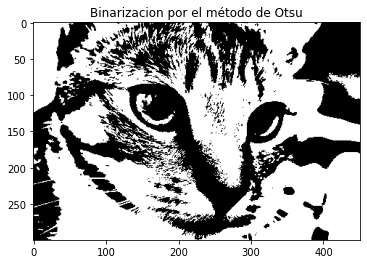

In [12]:
pixel_numb = img2.shape[0] * img2.shape[1]
prom_pond = 1/pixel_numb
bins = 100

hist = img3
final_thresh = -1
final_value = -1
intensity = np.arange(100)
for x in range (1,100):
    pcb = np.sum(hist[:x])
    pcf = np.sum(hist[x:])
    wb = pcb * prom_pond
    wf = pcf * prom_pond
    
    mub = np.sum(intensity[:x] * hist[:x]) / float(pcb)
    muf = np.sum(intensity[x:] * hist[x:]) / float(pcf)
    
    value = wb * wf * (mub-muf) **2
    if value > final_value:
        final_thresh = x/100
        final_value = value

print(final_thresh)
img8 = img2.copy()
img8[img2 > final_thresh] = 1
img8[img2 < final_thresh] = 0

plt.figure(6)
plt.title('Binarizacion por el método de Otsu')
plt.imshow(img8,'gray')